<a href="https://colab.research.google.com/github/Roxana2125128/Inteligencia-Artificial/blob/main/Assignment_6_Artificial_Neural_Network_feedforward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 6.- Artificial Neural Network: feedforward**

Roxana Pamela Martinez Córdova 2125128

Tamara Ramírez Alejandre 2109492

Jorge José Hernández Garza 2109528

Damaris Marlen Maldonado Lozano 2002610



Class: Inteligencia Artificial

Hora: Martes N4 - N6

# **1. Load Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns

# **2. Load Data**

In [2]:
# Load data
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


# **3. Data Preprocessing**

In [3]:
# Data preprocessing
# Normalize the images
train_data = train_data.reshape((train_data.shape[0], 28 * 28)).astype('float32') / 255
test_data = test_data.reshape((test_data.shape[0], 28 * 28)).astype('float32') / 255
# Encode labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# **4. Model Selection and Training**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8675 - loss: 0.4483 - val_accuracy: 0.9568 - val_loss: 0.1428
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9668 - loss: 0.1158 - val_accuracy: 0.9688 - val_loss: 0.1048
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9789 - loss: 0.0746 - val_accuracy: 0.9746 - val_loss: 0.0835
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9850 - loss: 0.0509 - val_accuracy: 0.9776 - val_loss: 0.0733
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9894 - loss: 0.0361 - val_accuracy: 0.9802 - val_loss: 0.0646


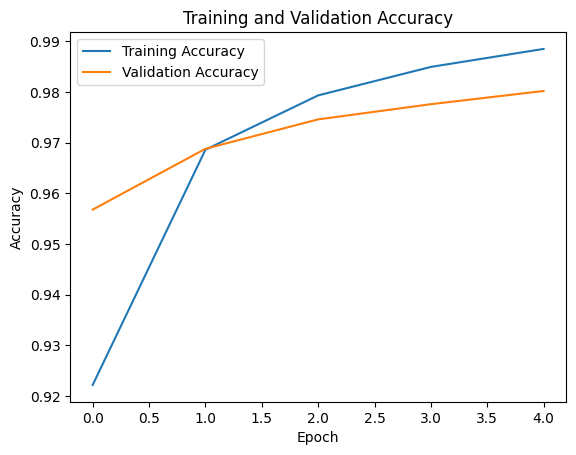

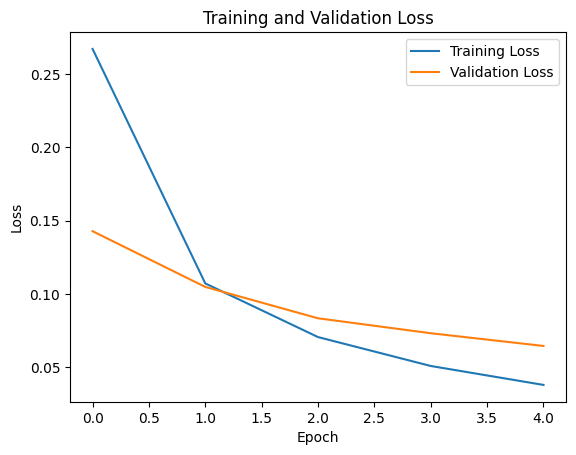

In [4]:
# Model selection and training
model = Sequential([
    Dense(512, activation='relu', input_shape=(28 * 28,)),
    Dense(10, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_data, train_labels, epochs=5, batch_size=128, validation_data=(test_data, test_labels))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


# **5. Model Testing**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9777 - loss: 0.0755
Test Accuracy: 0.9801999926567078
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Prediction: 2
Actual Value: 2


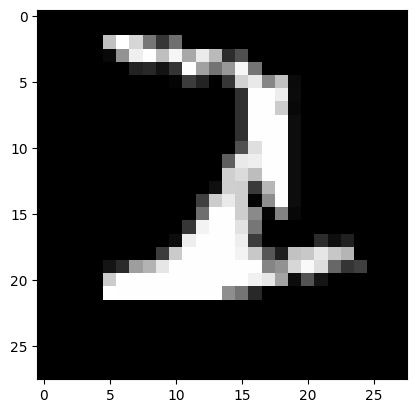

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction: 9
Actual Value: 9


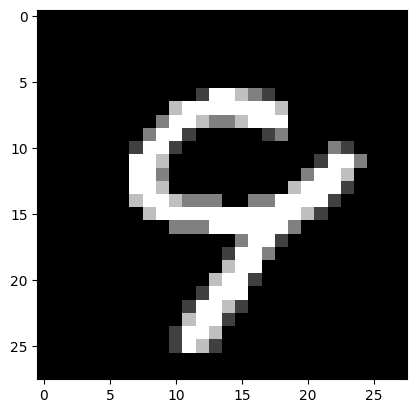

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction: 0
Actual Value: 0


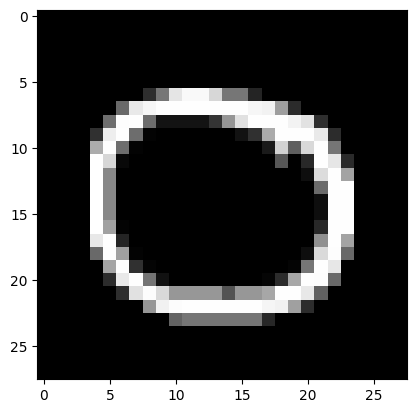

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction: 7
Actual Value: 7


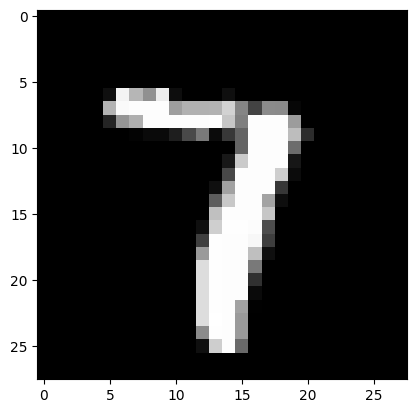

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Prediction: 6
Actual Value: 6


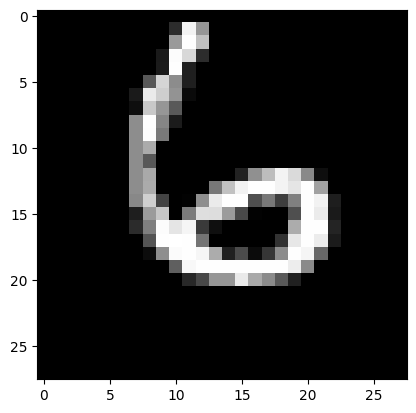

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


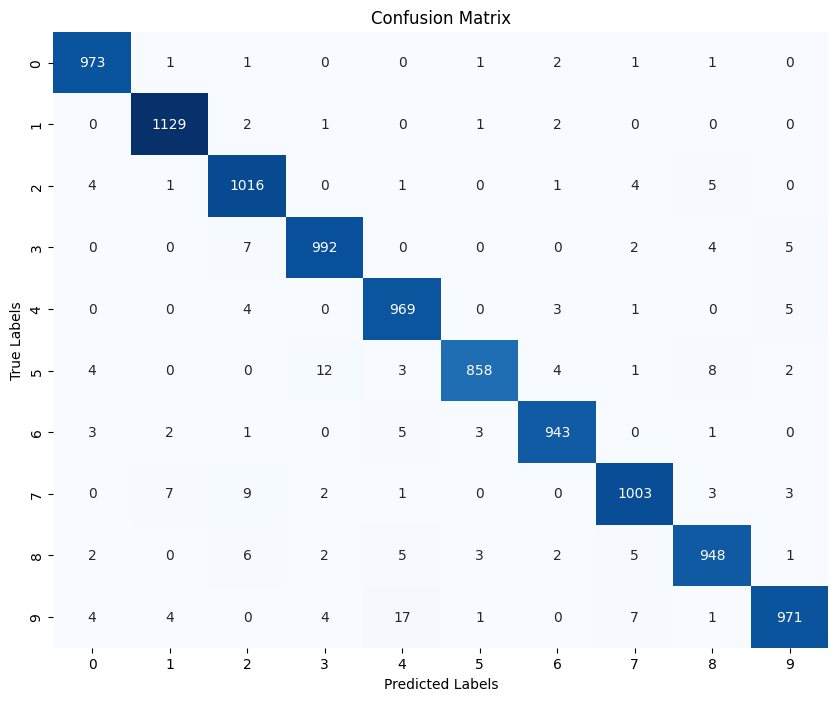

In [5]:
# Model testing
loss, accuracy = model.evaluate(test_data, test_labels)
print("Test Accuracy:", accuracy)

# Perform 5 different predictions
for _ in range(5):
    # Choose a random index from the test dataset
    idx = np.random.randint(0, len(test_data))
    # Make prediction
    predicted_label = np.argmax(model.predict(test_data[idx:idx+1]))
    # Display prediction and actual value
    print("Prediction:", predicted_label)
    print("Actual Value:", np.argmax(test_labels[idx]))
    # Plot the image
    plt.imshow(test_data[idx].reshape(28, 28), cmap='gray')
    plt.show()

# Confusion Matrix
predicted_labels = np.argmax(model.predict(test_data), axis=1)
true_labels = np.argmax(test_labels, axis=1)
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
